# <b> Laboratório 6

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab06/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from Resources import comsig
import bisect
import ModuleLab1
import ModuleLab2
import ModuleLab4
import ModuleLab5
import ModuleLab6
reload(ModuleLab1)
reload(ModuleLab2)
reload(ModuleLab4)
reload(ModuleLab5)
reload(ModuleLab6)

<module 'ModuleLab6' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab6/ModuleLab6.py'>

# E1

## a

Criamos o módulo necessário $\texttt{filtfun.py}$ adicionando a resposta ao impulso ao código fornecido.

## b

Realizamos dois testes: um para $[k, \alpha] = [20, 0.2]$ e outro para $[k, \alpha] = [20, 0]$

Para $[k, \alpha] = [20, 0.2]$:

In [2]:
Fs = 16000
tt = np.arange(-0.5*Fs, 0.5*Fs) / Fs
rt = np.zeros(tt.shape)
rt[np.where(tt == 0)[0][0]] = 1
sig_xt = comsig.sigWave(rt, Fs, -0.5)

In [3]:
res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=1000, k=20, alfa=0.2)

In [4]:
b = 0.01
sl = slice(bisect.bisect_left(res.timeAxis(), -b), bisect.bisect_left(res.timeAxis(), b))

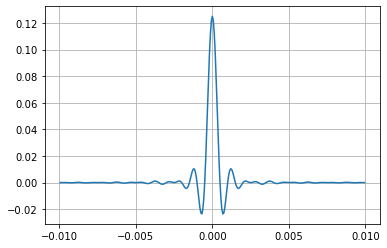

In [5]:
plt.xticks([-10e-3, -5e-3, 0, 5e-3, 10e-3])
plt.grid()
plt.plot(res.timeAxis()[sl], res.signal()[sl])

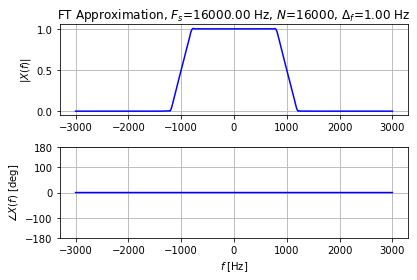

In [6]:
nff, absXf, argXf = ModuleLab2.showft(res.scale(Fs), [-3000, 3000, 10e-3])

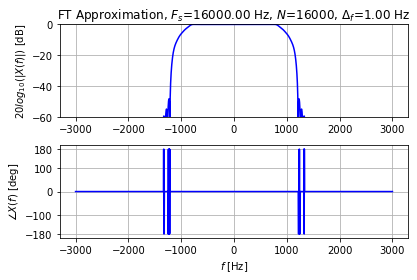

In [7]:
nff, absXf, argXf = ModuleLab2.showft(res.scale(Fs), [-3000, 3000, -60])

Todos os resultados estão conforme o esperado. Para o gráfico linear, temos a magnitude em banda base unitária e transição linear, assim como o gráfico dado no material. Na escala logarítmica, também temos o comportamento idêntico ao apresentado no material. Podemos ver que o filtro possui fase 0 dentro da banda passante.

Para $[k, \alpha] = [20, 0]$:

In [8]:
res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=1000, k=20, alfa=0.0)

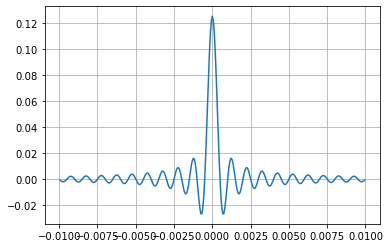

In [9]:
b = 0.01
sl = slice(bisect.bisect_left(res.timeAxis(), -b), bisect.bisect_left(res.timeAxis(), b))

plt.grid()
plt.plot(res.timeAxis()[sl], res.signal()[sl])

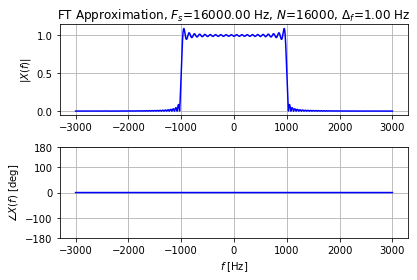

In [10]:
nff, absXf, argXf = ModuleLab2.showft(res.scale(Fs), [-3000, 3000, 5])

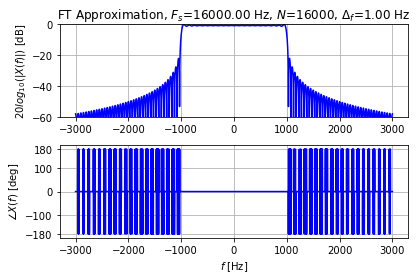

In [11]:
nff, absXf, argXf = ModuleLab2.showft(res.scale(Fs), [-3000, 3000, -60])

Para $\alpha = 0$, o filtro se torna mais perto de um LPF ideal (não é ideal porque estamos usando um h(t) finito): temos quase um 'sinc' no domínio do tempo, e quase uma porta no domínio da frequência. A banda de transição, que antes era linear, agora é bastante íngreme.

## c

In [12]:
Fs, rt = ModuleLab1.wavread("Files/pamsig601.wav")
sig_xt = comsig.sigWave(rt, Fs, 0)
res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=1000, k=10, alfa=0.2)
resSquared = comsig.sigWave(res.signal() ** 2, Fs)

In [13]:
def getFbfromRange(ff, Sxf, f1, f2):
    mx = -99999
    ret = 0
    for i, f in enumerate(ff):
        if f1 <= f <= f2:
            if Sxf[i] > mx:
                mx = Sxf[i]
                ret = f
    return ret

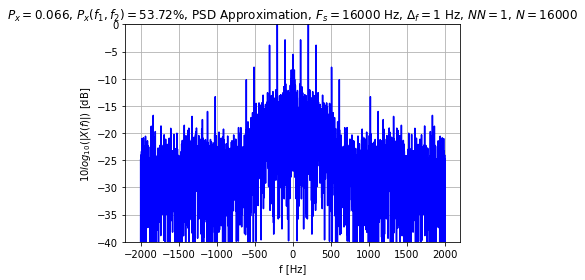

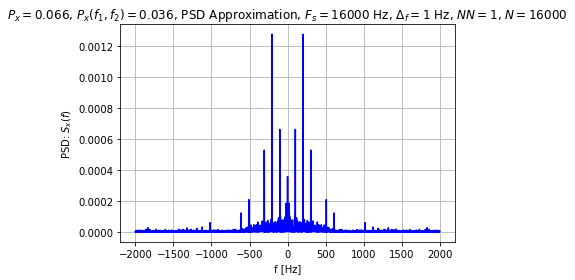

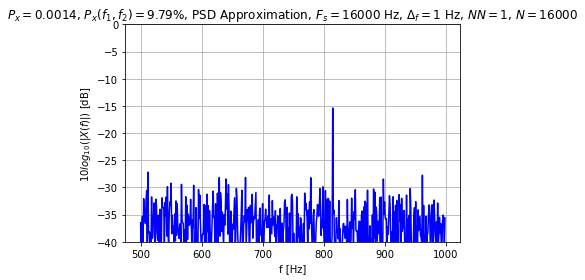

In [14]:
_, _ = ModuleLab5.showpsd(sig_xt, [-2000, 2000, -40], Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-2000, 2000, 0], Fs)
ff, Sxf = ModuleLab5.showpsd(resSquared, [500, 1000, -40], Fs)
FB = getFbfromRange(ff, Sxf, 700, 1000)

In [15]:
print("Fb é: ", FB, "Hz")

Fb é:  815.0 Hz


Testamos vários $f_L$ possíveis, mas da PSD acima do sinal original, sabemos que deve ser algo próximo a 500Hz, frequências menores bloqueiam o sinal original, maiores deixam passar ruído desnecessário.

350


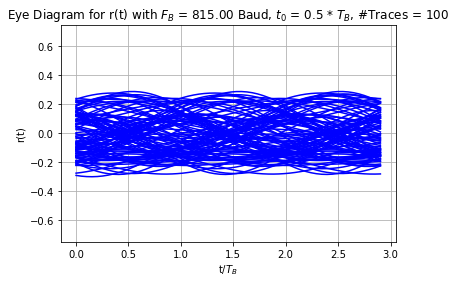

400


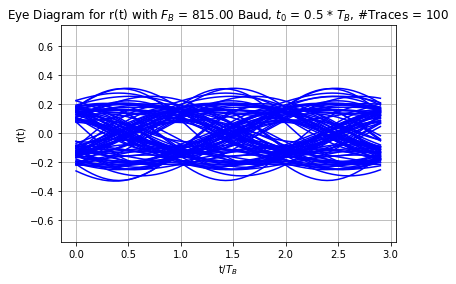

450


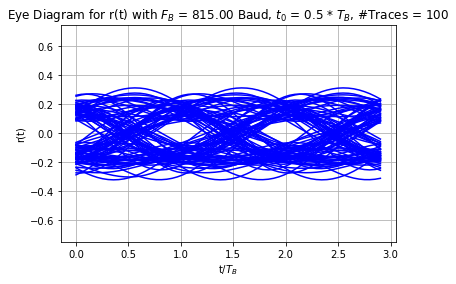

500


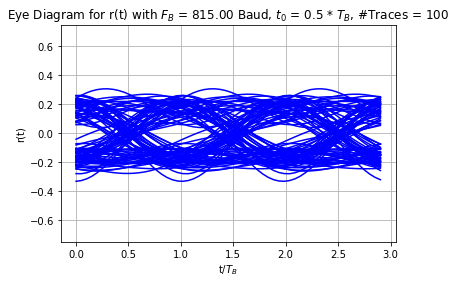

550


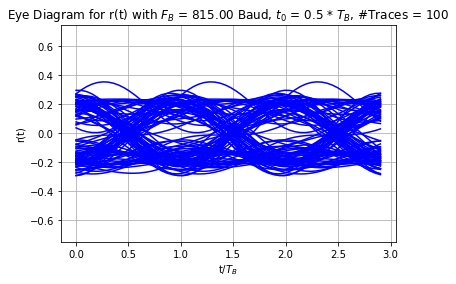

600


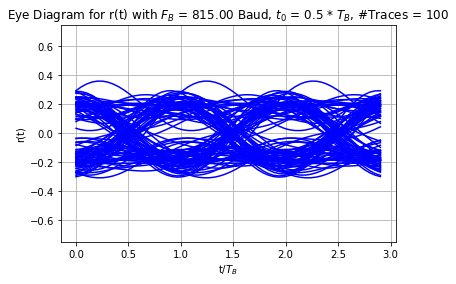

650


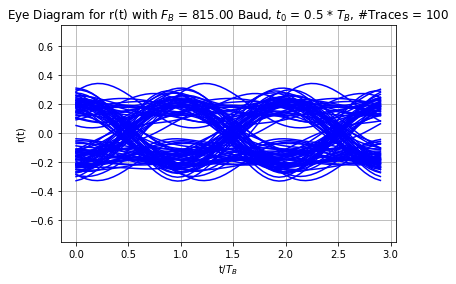

700


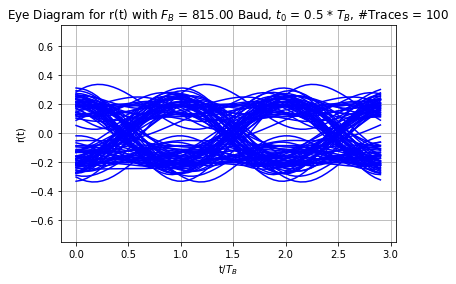

750


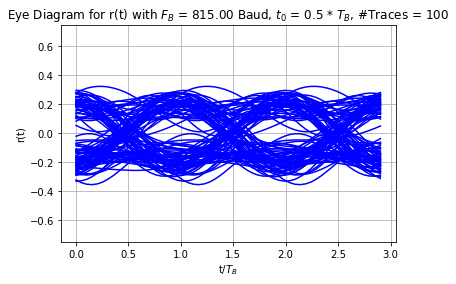

800


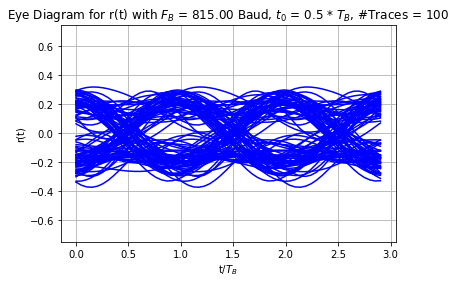

850


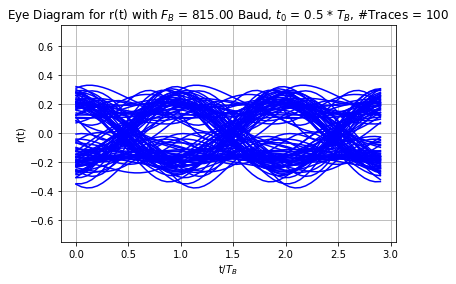

900


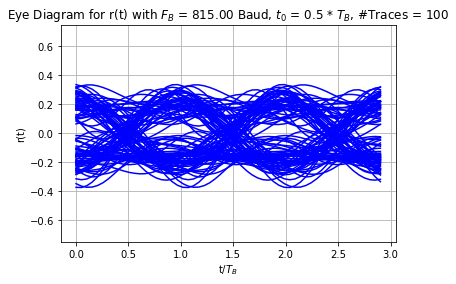

950


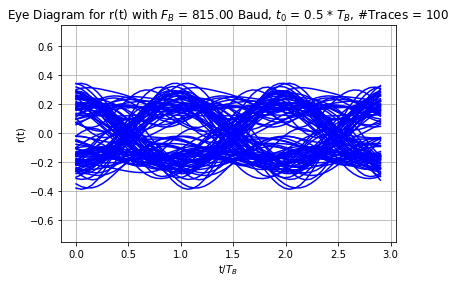

In [16]:
L = 0.5

for fLt in np.arange(350, 1000, 50):
    print(fLt)
    res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=fLt, k=10, alfa=0.0)
    ModuleLab4.showeye(res, FB, NTd=100, dispparms=[0.5, 3, -1.5*L, 1.5*L])

Podemos escolher $f_L \approx 500$ Hz.

Embora $F_B = 815$ Hz, a PSD do sinal original não tem componentes significativas acima de 600Hz, então podemos usar um $f_L$ menor que o $F_B$ e obter um olho mais aberto.

## d

O esquemático abaixo é utilizado para fazer os testes e confirmar o comportamento do filtro implementado.

A ideia utilizada é fazer medições de ganho relativo para diferentes valores de frequência e verificar que a resposta em frequência satisfaz o trapézio esperado. Usamos $\alpha = 0.2$ e $f_L = 1000$ Hz, portanto esperamos as seguintes medições:

<ul>
    <li> Para $f_0 < 800$ Hz: ganho relativo $\approx 0$ dB
    <li> Para $f_0 = 1000$ Hz: ganho relativo $\approx -6$ dB
    <li> Para $f_0 > 1200$ Hz: ganho relativo $\approx -\infty$ dB
        
Além da resposta linar na banda de transição [800, 1200]Hz
        
<img src="Prints/E1D-1.png">
<img src="Prints/E1D-2.png">
<img src="Prints/E1D-3.png">
<img src="Prints/E1D-4.png">
<img src="Prints/E1D-5.png">
<img src="Prints/E1D-6.png">

# E2

In [17]:
reload(ModuleLab1)
reload(ModuleLab2)
reload(ModuleLab4)
reload(ModuleLab5)
reload(ModuleLab6)

<module 'ModuleLab6' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab6/ModuleLab6.py'>

## a

Incrementamos a função "pam11" com o novo pulso "rrcf" e comparamos com o teste fornecido.

In [18]:
string = "Test"
bit_sequence = ModuleLab1.asc2bin(string)
polar = 2 * bit_sequence - 1
polar = np.concatenate((np.zeros(2, ), polar, np.zeros(2,)))
Fs = 44100
Fb = 100
n0 = 0
ss = comsig.sigSequ(polar, FB=Fb, n0=n0)

In [19]:
k, alpha = 4, 0.4
sig = ModuleLab6.pam12(ss, Fs = Fs, ptype="rrcf", pparms=[k, alpha])
stt = np.array(np.round(Fs * (np.arange(0, len(ss)) + ss.get_n0()) / Fb), dtype=np.int32) - int(np.ceil(Fs * (ss.get_n0() - 0.5) / Fb))
stt = stt[2:-2]

Text(0.5, 1.0, "Polar Binary PAM for 'Test', $F_b$ = 100 Baud, RRCf $p(t)$, k=4, alpha=0.4")

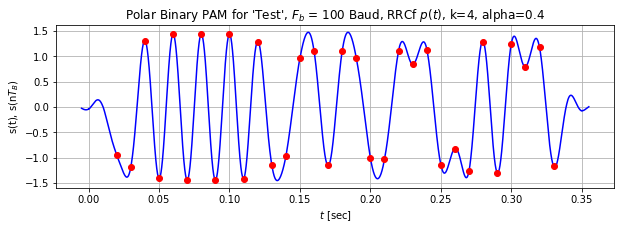

In [20]:
plt.figure(figsize=(10, 3))
plt.plot(sig.timeAxis(), sig.signal(), color = "blue")
plt.plot(sig.timeAxis()[stt], sig.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, RRCf $p(t)$, k={k}, alpha={alpha}")

## b

Usamos a definição da função dada e incrementamos com os pulsos já determinados na função pam12.

## c

Para todos os sinais, inicialmente realizamos uma análise com plots PSD, diagrama de olho e no tempo para descobrir o máximo de informações possíveis como $F_B$, pulso utilizado, banda, etc. Então, utilizamos a função de recepção pam feita na letra b.

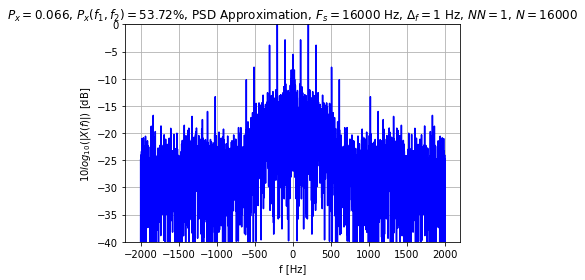

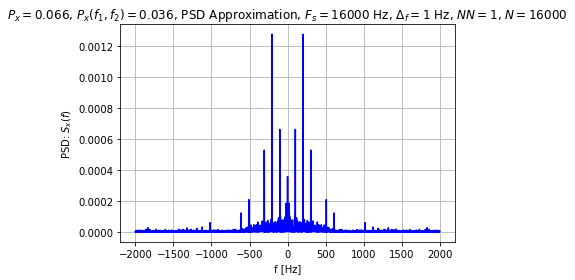

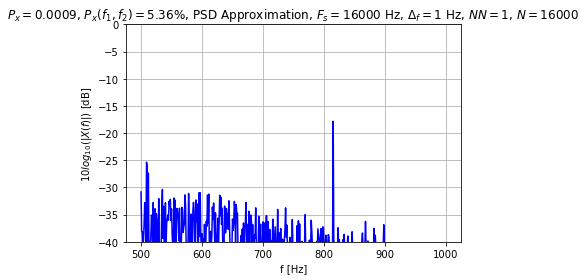

815.0


In [21]:
Fs, rt = ModuleLab1.wavread("Files/pamsig601.wav")
sig_xt = comsig.sigWave(rt, Fs, -1 / (2 * FB))
res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=550, k=10, alfa=0.4)
resSquared = comsig.sigWave(res.signal() ** 2, Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-2000, 2000, -40], Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-2000, 2000, 0], Fs)
ff, Sxf = ModuleLab5.showpsd(resSquared, [500, 1000, -40], Fs)
FB = getFbfromRange(ff, Sxf, 700, 1000)
print(FB)

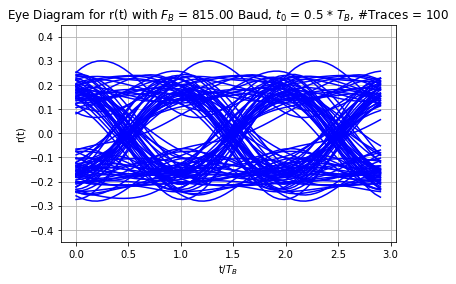

In [22]:
L = 0.3
ModuleLab4.showeye(res, FB, NTd=100, dispparms=[0.5, 3, -1.5*L, 1.5*L])

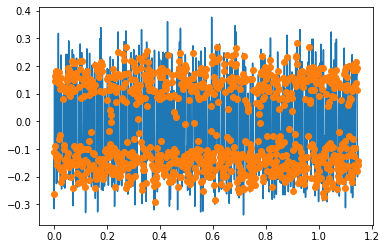

In [23]:
seq, sig, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0.0], ptype="sinc", pparms=[3, 0.5])
plt.plot(sig.timeAxis(), sig.signal())
plt.plot(sig.timeAxis()[ixn], sig.signal()[ixn], "o")

In [24]:
bits = np.where(seq.signal() >= 0, 1, 0)
print(len(bits))
res = ModuleLab1.bin2asc(bits[:len(bits) // 8 * 8], bits = 8, flg = 0)
print(res)

937
The house spider is there to bri~g good luck!
Most spiders have 8 eyes and 8 legs.
Is that why some of them "byte"?


16000


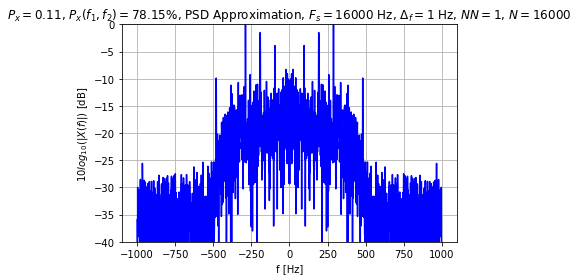

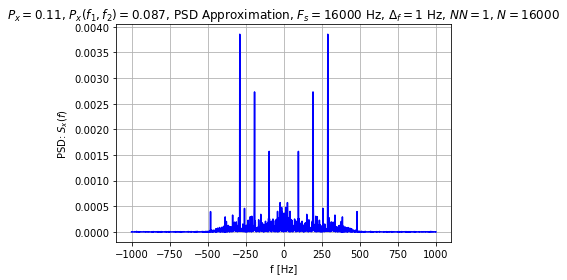

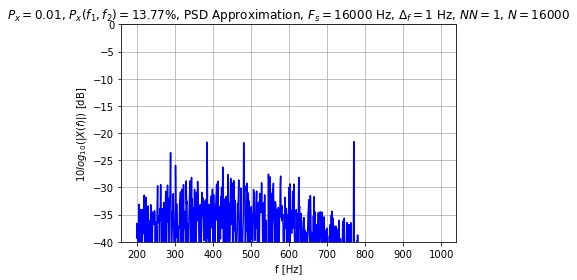

770.0


In [25]:
Fs, rt = ModuleLab1.wavread("Files/pamsig602.wav")
print(Fs)
sig_xt = comsig.sigWave(rt, Fs, -1 / (2 * FB))
res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=500, k=10, alfa=0.2)
resSquared = comsig.sigWave(res.signal() ** 2, Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-1000, 1000, -40], Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-1000, 1000, 0], Fs)
ff, Sxf = ModuleLab5.showpsd(resSquared, [200, 1000, -40], Fs)
FB = getFbfromRange(ff, Sxf, 200, 1000)
print(FB)

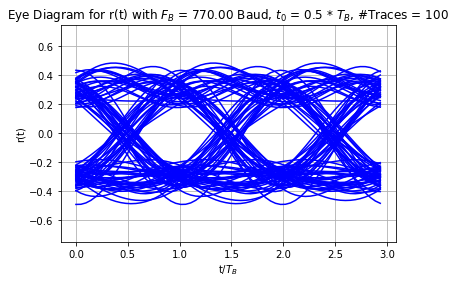

In [26]:
L = 0.5
ModuleLab4.showeye(res, FB, NTd=100, dispparms=[0.5, 3, -1.5*L, 1.5*L])

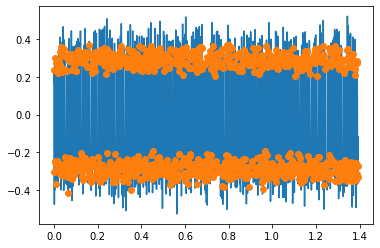

In [27]:
seq, sig, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0.0], ptype="rrcf", pparms=[3, 0.5])
plt.plot(sig.timeAxis(), sig.signal())
plt.plot(sig.timeAxis()[ixn], sig.signal()[ixn], "o")

In [28]:
bits = np.where(seq.signal() >= 0, 1, 0)
print(len(bits))
res = ModuleLab1.bin2asc(bits[:len(bits) // 8 * 8], bits = 8, flg = 0)
print(res)

1073
I was thrown out of college for cheating on the metaphysics exam;
I looked into the soul of the boy sitting next to me. (Woody Allen)


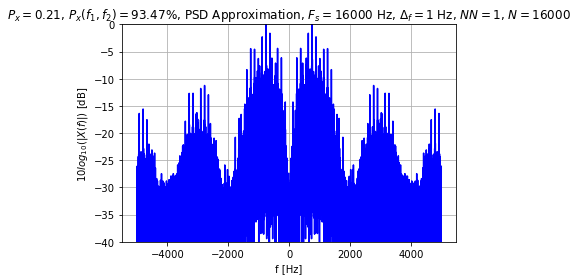

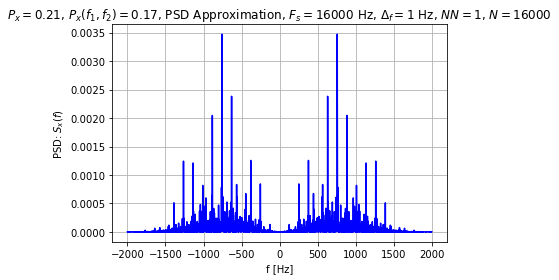

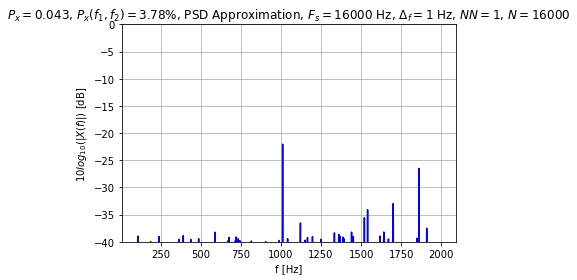

1010.0


In [29]:
Fs, rt = ModuleLab1.wavread("Files/pamsig603.wav")
sig_xt = comsig.sigWave(rt, Fs, -1 / (2 * FB))
res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=2000, k=10, alfa=0.2)
resSquared = comsig.sigWave(res.signal() ** 2, Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-5000, 5000, -40], Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-2000, 2000, 0], Fs)
ff, Sxf = ModuleLab5.showpsd(resSquared, [100, 2000, -40], Fs)
FB = getFbfromRange(ff, Sxf, 200, 1100)
print(FB)

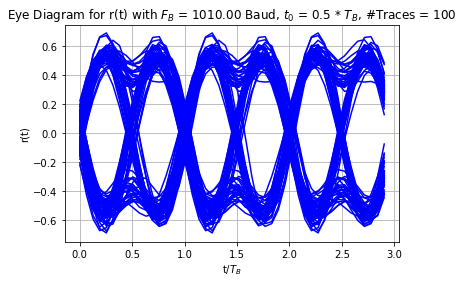

In [30]:
L = 0.5
ModuleLab4.showeye(res, FB, NTd=100, dispparms=[0.5, 3, -1.5*L, 1.5*L])

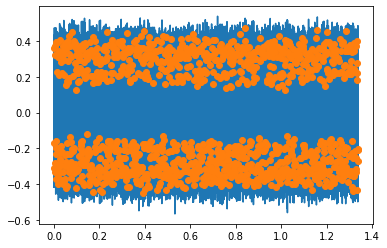

In [31]:
seq, sig, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0.0], ptype="man", pparms=[])
plt.plot(sig.timeAxis(), sig.signal())
plt.plot(sig.timeAxis()[ixn], sig.signal()[ixn], "o")

In [32]:
bits = np.where(seq.signal() >= 0, 1, 0)
print(len(bits))
res = ModuleLab1.bin2asc(bits[:len(bits) // 8 * 8], bits = 8, flg = 0)
print(res)

1353
The quick brown fox jumps over the lazy dog 0123456789.
The quick brown fox jumps over the lazy dog 0123456789.
The quick brown fox jumps over the lazy dog 0123456789.


Os 3 sinais foram decodificados corretamente.

## d

Implementação da função do filtro casado pamhRt de tempo discreto (pegamos a saída da função pampt, revertemos no tempo e normalizamos).

## e

Montamos o esquemático fornecido na introdução com a integração dos novos filtros discretos.

São utilizados 3 pulsos: manchester, retangular e rrcf, cada um é visualizado na frequência e no tempo.

<img src="Prints/E2E-1.png">
<img src="Prints/E2E-2.png">
<img src="Prints/E2E-3.png">
<img src="Prints/E2E-4.png">

Então, fazemos os testes comparando qual $A_n$ deve ser escolhido para ter erros ocasionais para cada tipo de pulso.

<img src="Prints/E2E-5.png">
<img src="Prints/E2E-6.png">
<img src="Prints/E2E-7.png">

Para os 3 pulsos os erros começam a aperecer com $A_n \approx 0.8$. De forma geral, a razão da energia investida no sinal sobre a energia do ruído (SNR) é o que determina a quantidade de erros, como para esses 3 pulsos temos a mesma energia média resultante na transmissão, então não há diferença significativa entre eles. Se um dos pulsos utilizados resultar em uma menor energia média do sinal transmitido, então este pulso resultaria em uma SNR menor, tendo portanto mais erros. Ou seja, a escolha do pulso não deveria afetar o resultado em essência, mas pode afetar na prática devido à modificações na energia transmitida (depenendo da definição do pulso) ou características práticas de recepção do sinal. O SNR é uma métrica mais confiável para determinar a taxa de erro.

## f

Novamente, montamos o esquemático pedido e verificamos o limiar $A_n$ para diferentes filtros.

Para o pulso 'rrcf' a tolerância ao ruído parece ser aproximadamente igual ao implementado anteriormente.

Para os pulsos 'rect' e 'man' (que na prática também é um rect), o bloco polyphase clock sync tem problemas, conforme visto na página 21 do material. O bloco de polyphase com pulso 'rect' gera um erro (gera um Not a Number NaN), e com o pulso 'man' a derivada aplicada pelo bloco comporta-se de maneira estranha.


Se usarmos o pulso 'tri', conseguimos receber o sinal sem problemas, conforme sugerido no material (na parte introdutória).

<img src="Prints/E2F-1.png">
<img src="Prints/E2F-2.png">
Para o pulso 'rect':
<img src="Prints/E2F-3.png">
<img src="Prints/E2F-4.png">

# E3

## a

Para todos os pulsos indicados conferimos a ISI tanto após a aplicação da função pam12 como após a recepção pela função pamrcv01.

In [33]:
an = ModuleLab1.asc2bin("String de Teste")
dn = 2 * an - 1
Fs = 44100
FB = 100
sig_dn = comsig.sigSequ(dn, FB)

### Para o pulso 'man'

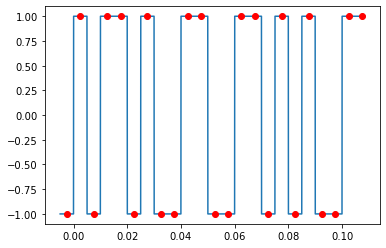

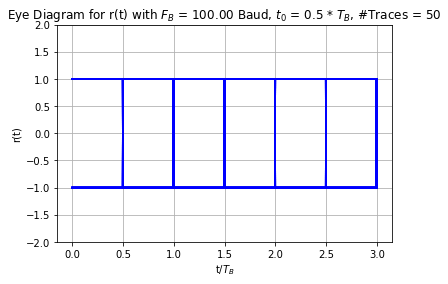

In [34]:
sig_xt = ModuleLab6.pam12(sig_dn, Fs, 'man', [])
n0 = 0
len_sig_seq = len(an)
Fb = 2 * FB
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

sl = slice(0, 5000)
plt.plot(sig_xt.timeAxis()[sl],sig_xt.signal()[sl])
until = bisect.bisect_left(stt, sl.stop)
plt.plot(sig_xt.timeAxis()[stt][:until], sig_xt.signal()[stt][:until], marker = "o", color = "red", linestyle="none")

ModuleLab4.showeye(sig_xt, FB , 50, [0.5, 3, -2, 2])

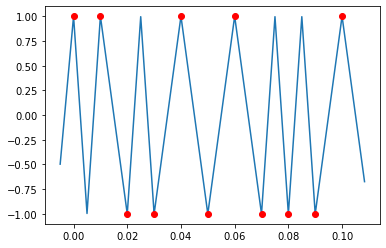

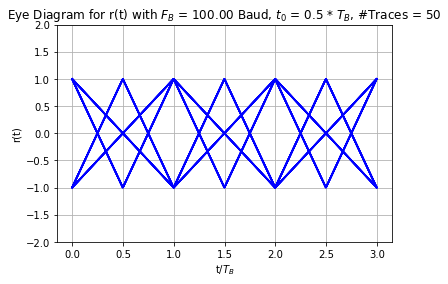

String de Teste


In [35]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0], 'man', [])
plt.plot(sig_bt.timeAxis()[sl],sig_bt.signal()[sl])
until = bisect.bisect_left(ixn, sl.stop)
plt.plot(sig_bt.timeAxis()[ixn][:until], sig_bt.signal()[ixn][:until], marker = "o", color = "red", linestyle="none")
ModuleLab4.showeye(sig_bt, FB , 50, [0.5, 3, -2, 2])
print(ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0, 1, 0), bits = 8, flg = 0))

Não há ISI nos instantes de amostragem para o pulso manchester nem antes do filtro casado e nem depois (embora exista depois do filtro para $t \ne \frac{t}{T_B}$).

### Para o pulso 'rcf'

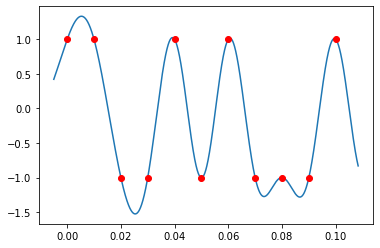

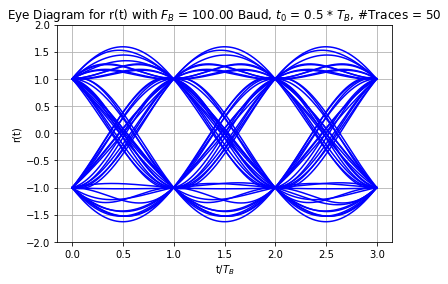

In [36]:
k, alpha = 5, 0.4
sig_xt = ModuleLab6.pam12(sig_dn, Fs, 'rcf', [k, alpha])
n0 = 0
len_sig_seq = len(an)
Fb = FB
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

sl = slice(0, 5000)
plt.plot(sig_xt.timeAxis()[sl],sig_xt.signal()[sl])
until = bisect.bisect_left(stt, sl.stop)
plt.plot(sig_xt.timeAxis()[stt][:until], sig_xt.signal()[stt][:until], marker = "o", color = "red", linestyle="none")

ModuleLab4.showeye(sig_xt, FB , 50, [0.5, 3, -2, 2])

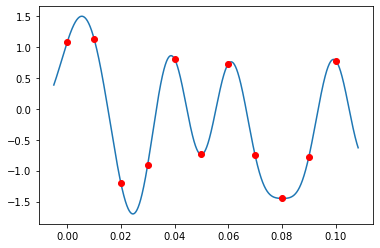

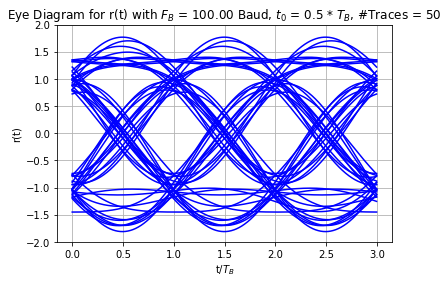

String de Teste


In [37]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0], 'rcf', [k, alpha])
plt.plot(sig_bt.timeAxis()[sl],sig_bt.signal()[sl])
until = bisect.bisect_left(ixn, sl.stop)
plt.plot(sig_bt.timeAxis()[ixn][:until], sig_bt.signal()[ixn][:until], marker = "o", color = "red", linestyle="none")
ModuleLab4.showeye(sig_bt, FB , 50, [0.5, 3, -2, 2])
print(ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0, 1, 0), bits = 8, flg = 0))

Para o pulso 'rcf' não temos ISI nos instantes de amostragem para o sinal recebido, mas temos depois do filtro casado. Se considerarmos os instantes de amostragem (múltiplos inteiro de $\frac{t}{T_B}$) temos uma variância dos valores amostrados no intervalo [0.7, 1.3] (se esse for o parâmetro para "fechamento" do olho então temos aproximadamente 30% de fechamento).

### Para o pulso 'rect'

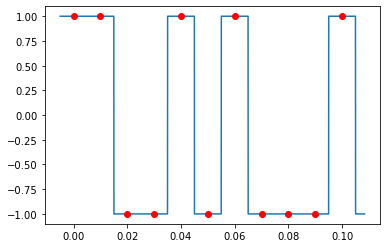

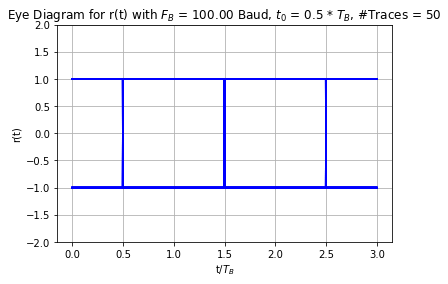

In [38]:
sig_xt = ModuleLab6.pam12(sig_dn, Fs, 'rect', [])
n0 = 0
len_sig_seq = len(an)
Fb = FB
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

sl = slice(0, 5000)
plt.plot(sig_xt.timeAxis()[sl],sig_xt.signal()[sl])
until = bisect.bisect_left(stt, sl.stop)
plt.plot(sig_xt.timeAxis()[stt][:until], sig_xt.signal()[stt][:until], marker = "o", color = "red", linestyle="none")

ModuleLab4.showeye(sig_xt, FB , 50, [0.5, 3, -2, 2])

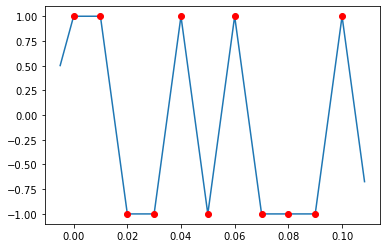

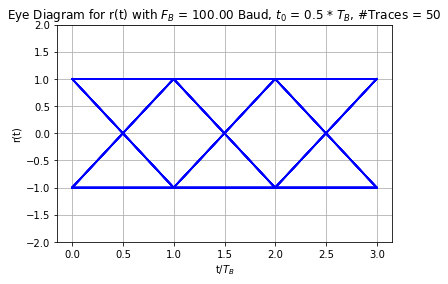

String de Teste


In [39]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0], 'rect', [])
plt.plot(sig_bt.timeAxis()[sl],sig_bt.signal()[sl])
until = bisect.bisect_left(ixn, sl.stop)
plt.plot(sig_bt.timeAxis()[ixn][:until], sig_bt.signal()[ixn][:until], marker = "o", color = "red", linestyle="none")
ModuleLab4.showeye(sig_bt, FB , 50, [0.5, 3, -2, 2])
print(ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0, 1, 0), bits = 8, flg = 0))

Não há ISI nos instantes de amostragem para o pulso retangular nem antes do filtro casado e nem depois (embora exista depois do filtro para $t \ne \frac{t}{T_B}$).

### Para o pulso 'rrcf'

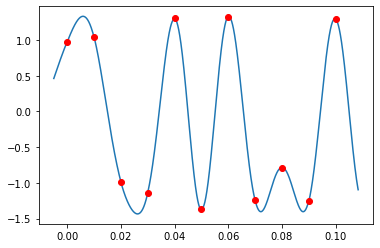

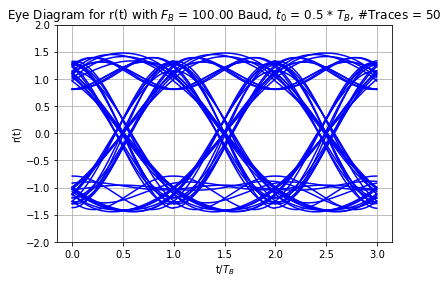

In [40]:
k, alpha = 4, 0.4
sig_xt = ModuleLab6.pam12(sig_dn, Fs, 'rrcf', [k, alpha])
n0 = 0
len_sig_seq = len(an)
Fb = FB
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

sl = slice(0, 5000)
plt.plot(sig_xt.timeAxis()[sl],sig_xt.signal()[sl])
until = bisect.bisect_left(stt, sl.stop)
plt.plot(sig_xt.timeAxis()[stt][:until], sig_xt.signal()[stt][:until], marker = "o", color = "red", linestyle="none")

ModuleLab4.showeye(sig_xt, FB , 50, [0.5, 3, -2, 2])

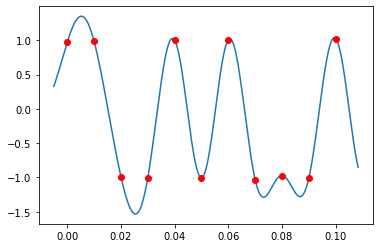

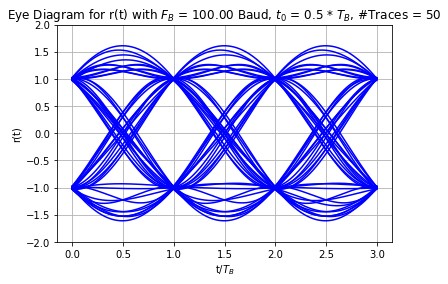

String de Teste


In [41]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0], 'rrcf', [k, alpha])
plt.plot(sig_bt.timeAxis()[sl],sig_bt.signal()[sl])
until = bisect.bisect_left(ixn, sl.stop)
plt.plot(sig_bt.timeAxis()[ixn][:until], sig_bt.signal()[ixn][:until], marker = "o", color = "red", linestyle="none")
ModuleLab4.showeye(sig_bt, FB , 50, [0.5, 3, -2, 2])
print(ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0, 1, 0), bits = 8, flg = 0))

Para o pulso 'rrcf' temos ISI no sinal recebido mas não temos no sinal depois do filtro casado. O olho de fecha em aproximadamente 25% para o sinal recebido.

### Para o pulso 'sinc'

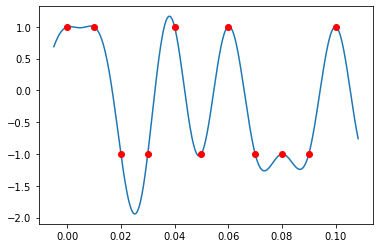

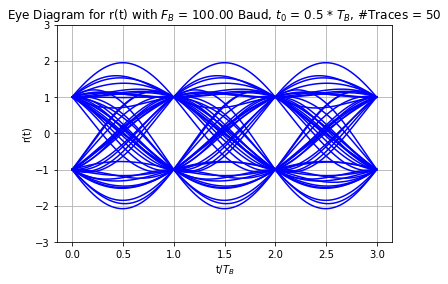

In [42]:
k, beta = 15, 0.25
sig_xt = ModuleLab6.pam12(sig_dn, Fs, 'sinc', [k, beta])
n0 = 0
len_sig_seq = len(an)
Fb = FB
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

sl = slice(0, 5000)
plt.plot(sig_xt.timeAxis()[sl],sig_xt.signal()[sl])
until = bisect.bisect_left(stt, sl.stop)
plt.plot(sig_xt.timeAxis()[stt][:until], sig_xt.signal()[stt][:until], marker = "o", color = "red", linestyle="none")

ModuleLab4.showeye(sig_xt, FB , 50, [0.5, 3, -3, 3])

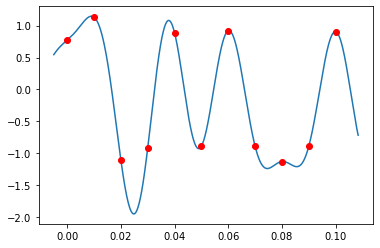

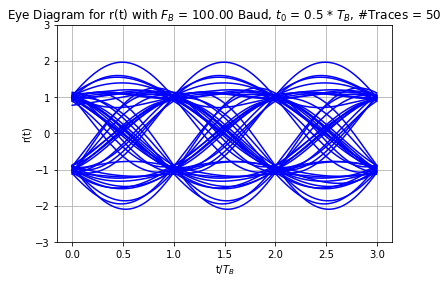

String de Teste


In [43]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0], 'sinc', [k, beta])
plt.plot(sig_bt.timeAxis()[sl],sig_bt.signal()[sl])
until = bisect.bisect_left(ixn, sl.stop)
plt.plot(sig_bt.timeAxis()[ixn][:until], sig_bt.signal()[ixn][:until], marker = "o", color = "red", linestyle="none")
ModuleLab4.showeye(sig_bt, FB , 50, [0.5, 3, -3, 3])
print(ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0, 1, 0), bits = 8, flg = 0))

Para o pulso sinc não há ISI nos momentos de amostragem para o sinal recebido, mas há uma pequena ISI no sinal depois do filtro casado. O olho se fecha por aproximadamente 5%.

### Para o pulso 'tri'

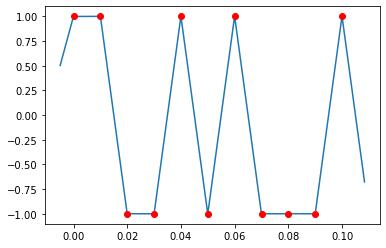

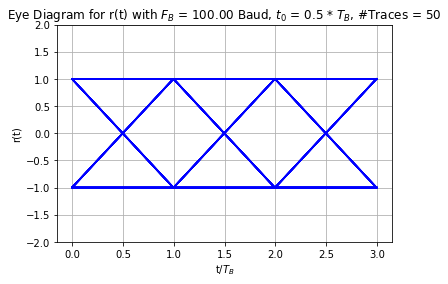

In [44]:
sig_xt = ModuleLab6.pam12(sig_dn, Fs, 'tri', [])
n0 = 0
len_sig_seq = len(an)
Fb = FB
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

sl = slice(0, 5000)
plt.plot(sig_xt.timeAxis()[sl],sig_xt.signal()[sl])
until = bisect.bisect_left(stt, sl.stop)
plt.plot(sig_xt.timeAxis()[stt][:until], sig_xt.signal()[stt][:until], marker = "o", color = "red", linestyle="none")

ModuleLab4.showeye(sig_xt, FB , 50, [0.5, 3, -2, 2])

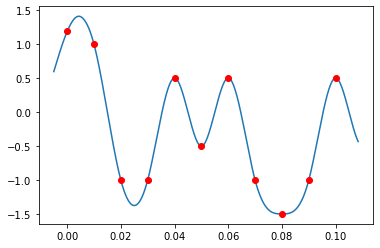

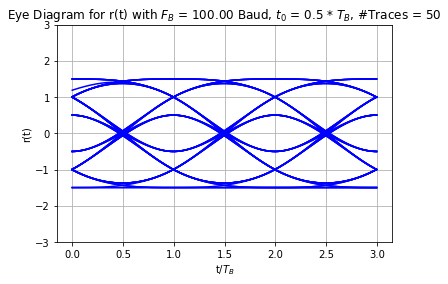

String de Teste


In [45]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB, 0], 'tri', [])
plt.plot(sig_bt.timeAxis()[sl],sig_bt.signal()[sl])
until = bisect.bisect_left(ixn, sl.stop)
plt.plot(sig_bt.timeAxis()[ixn][:until], sig_bt.signal()[ixn][:until], marker = "o", color = "red", linestyle="none")
ModuleLab4.showeye(sig_bt, FB , 50, [0.5, 3, -3, 3])
print(ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0, 1, 0), bits = 8, flg = 0))

Para o pulso triangular não há ISI no sinal recebido, mas há bastante ISI no sinal depois do filtro casado. O olho se fecha por aproximadamente 50%.

## b

Utilizamos o mesmo esquemático já montado na questão E2E, e fazemos as simulações.

Os erros ocasionais começam a aparecer com $A_n$:
<ul>
    <li> 'rcf': 0.7
    <li> 'tri': 0.35
    <li> 'rcf': 0.5
</ul>
Para o pulso 'rcf' com $\alpha = 0$, os erros começam a aparecer um pouco antes em $\approx 0.6$.
        
Conforme dito anteriormente, a relação sinal-ruído é uma métrica relevante para a determinação da quantidade de erro. Pulsos como o 'tri' possuem menor potência no sinal original para a mesma amplitude de entrada, portanto um mesmo $A_n$ corresponde a uma maior probabilidade de erro quando comparado ao pulso 'rcf' que possui maior energia para a mesma amplitude de entrada.

Abaixo, pode-se observar a diferença de potência no sinal transmitido ao variar o pulso entre 'rcf' e 'tri'

<img src="Prints/E3B-1.png">
<img src="Prints/E3B-2.png">

## c

Fazendo o mesmo, mas agora usando o bloco Polyphase Clock Sync

Os erros ocasionais começam a aparecer com $A_n$:
<ul>
    <li> 'rcf': 0.7
    <li> 'tri': 0.35
    <li> 'rcf': 0.5
</ul>

Uma observação relevante a respeito do uso do bloco Polyphase Clock Sync é que por se tratar de um algoritmo que adquire automaticamente o sincronismo dos símbolos, caso se utilize uma relação sinal-ruído muito baixa, o bloco tem problemas adicionais para recuperar as informações de tempo, resultando em perda de sincronismo, um teste interessante é utilizar o pulso 'tri' e aumentar o ruído de forma que se perca todo o sinal e depois baixar o ruído para 0, pode-se ver que o algoritmo perderá as informação do sinal (precisa-se reiniciar o programa nesse caso). Isso ilustra que embora o algoritmo seja "automático", temos uma dependência de funcionamento relacionada a qualidade do sinal recebido. Essa mesma característica não acontece com o esquemático da letra "b", pois nele estamos nós mesmos selecionando o delay correto.

### d

A ideia principal utilizada aqui é se utilizar do filtro de recepção como se tivessemos transmitido um pulso retangular (esse filtro de recepção tira a média do sinal recebido no intervalo).

Caso tenhamos transmitido o símbolo zero, o sinal transmitido será um pulso com média 0 na saída do filtro teremos uma estimativa com baixo valor absoluto.
Caso tenhamos transmitido o símbolo um, o sinal recebido será um pulso com média 1 e na saída do filtro teremosuma estimativa com alto valor absoluto.

Para sinais com pouco ruído esse filtro de correlação é suficiente. Para o segundo sinal (com mais ruído), usamos um segunda recepção utilizando o pulso de Manchester.

Para ambos os sinais precisamos descobrir inicialmente o $F_B$ por meio da análise da PSD (de $s^2(t)$ e $|\frac{ds}{dt}|$).

44100


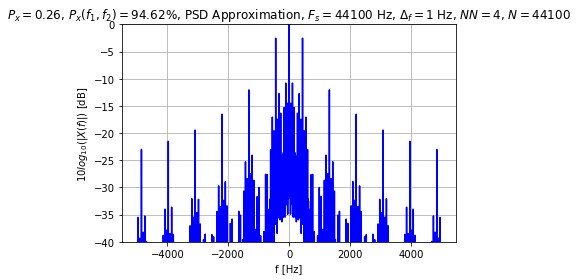

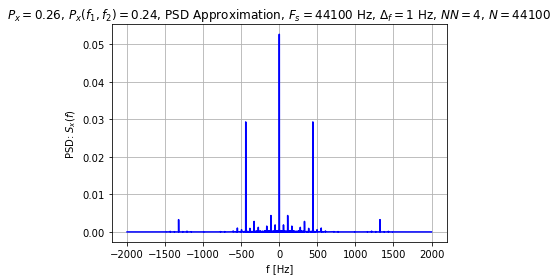

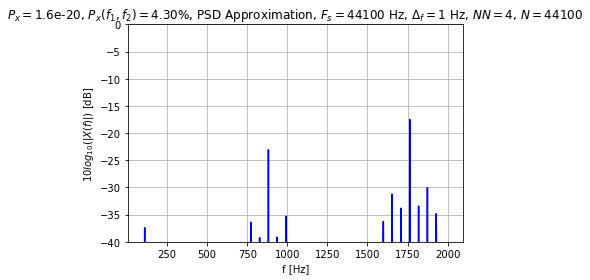

882.0


In [46]:
Fs, rt = ModuleLab1.wavread("Files/pamsig605.wav")
print(Fs)
FB = 441 * 2
sig_xt = comsig.sigWave(rt, Fs, - 1 / (FB / 2))
res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=2000, k=10, alfa=0.2)
res = comsig.sigWave(res.signal() / Fs, Fs, res.get_t0())
resSquared = comsig.sigWave(res.signal() ** 2, Fs)
ffo, Sxfo = ModuleLab5.showpsd(sig_xt, [-5000, 5000, -40], Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-2000, 2000, 0], Fs)
ff, Sxf = ModuleLab5.showpsd(resSquared, [100, 2000, -40], Fs)
FB = getFbfromRange(ff, Sxf, 50, 1000)
print(FB)

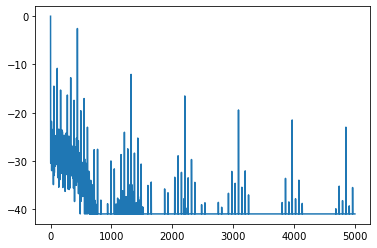

In [47]:
plt.plot(ffo[len(ffo)//2:], Sxfo[len(ffo)//2:])

In [48]:
getFbfromRange(ffo, Sxfo, 100, 1000)

441.0

In [49]:
getFbfromRange(ffo, Sxfo, 1000, 2000)

1323.0

In [50]:
getFbfromRange(ffo, Sxfo, 2000, 3000)

2205.0

In [51]:
441.0 * 3

1323.0

In [52]:
441.0 * 5

2205.0

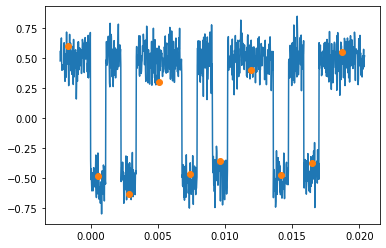

In [53]:
ixn = np.arange(25, 217600, int(Fs/(FB/2)))
sl = slice(0, 1000)
plt.plot(sig_xt.timeAxis()[sl], sig_xt.signal()[sl])
until = bisect.bisect_left(ixn, sl.stop)
plt.plot(sig_xt.timeAxis()[ixn][:until], sig_xt.signal()[ixn][:until], "o")

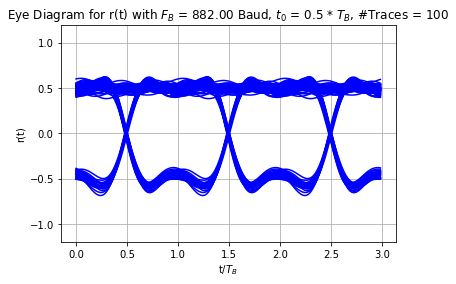

In [54]:
L = 0.8
ModuleLab4.showeye(res.scale(Fs), FB, NTd=100, dispparms=[0.5, 3, -1.5*L, 1.5*L])

In [55]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(res.scale(Fs), [FB/2, 0.5], 'rect', [])

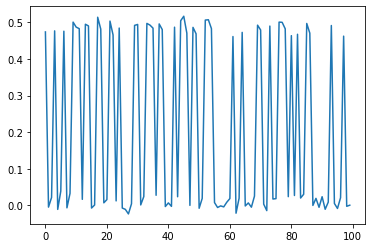

In [56]:
plt.plot(sig_bn.signal()[:100])

(array([1059.,  126.,    0.,    0.,    0.,    0.,    0.,    0.,  236.,
         755.]),
 array([-0.03146501,  0.0251706 ,  0.0818062 ,  0.13844181,  0.19507741,
         0.25171301,  0.30834862,  0.36498422,  0.42161982,  0.47825543,
         0.53489103]),
 <a list of 10 Patch objects>)

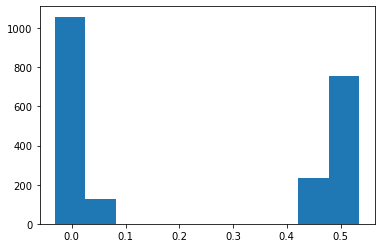

In [57]:
plt.hist(sig_bn.signal())

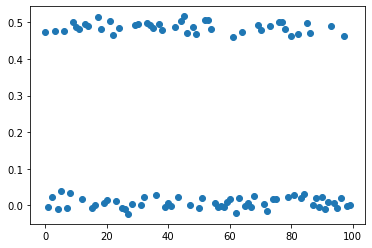

In [58]:
plt.plot(sig_bn.signal()[:100], "o")

In [59]:
bits = np.where(sig_bn.signal() >= 0.25, 1, 0)

In [60]:
ModuleLab1.bin2asc(bits, bits = 8, flg = 0)

"Infants are born with a natural love of sweetness, scientists say, so it's no wonder that when the ancient Greeks imagined what their gods might dine on, they dreamed of nectar and ambrosia, the former usually describing a divine drink and the latter the food of the gods."

Agora para o sinal com mais ruído: utilizamos o mesmo filtro anterior, mas agora também consideramos a componente do filtro "Manchester", decodificamos utilizandos os dois filtros e somamos os sinais resultantes, então amostramos os sinais.

44100


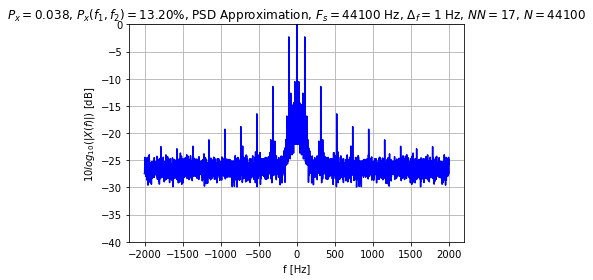

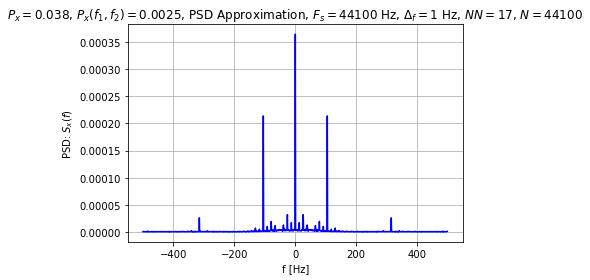

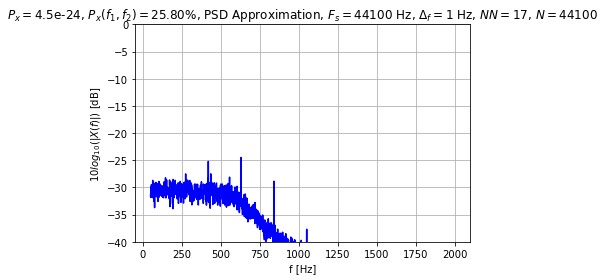

210


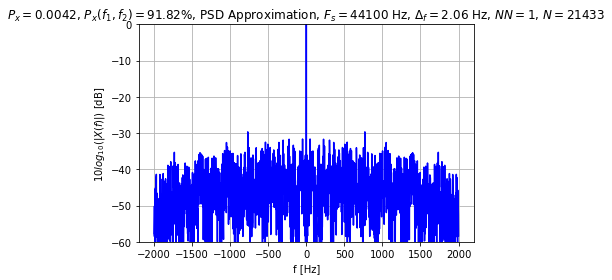

In [61]:
Fs, rt = ModuleLab1.wavread("Files/pamsig606.wav")
print(Fs)
FB = 105 * 2
sig_xt = comsig.sigWave(rt, Fs, - 1 / (FB / 2))
res, filterOrder = ModuleLab6.trapfilt(sig_xt, fL=700, k=10, alfa=0.2)
res = comsig.sigWave(res.signal() / Fs, Fs, res.get_t0())
resSquared = comsig.sigWave(res.signal() ** 2, Fs)
sigDiff = comsig.sigWave(np.abs(np.diff(sig.signal())), Fs)
ffo, Sxfo = ModuleLab5.showpsd(sig_xt, [-2000, 2000, -40], Fs)
_, _ = ModuleLab5.showpsd(sig_xt, [-500, 500, 0], Fs)
ff, Sxf = ModuleLab5.showpsd(resSquared, [50, 2000, -40], Fs)
_ = getFbfromRange(ff, Sxf, 1100, 1500)
print(FB)
ff, Sxf = ModuleLab5.showpsd(sigDiff, [-2000, 2000, -60], Fs)
# FB = getFbfromRange(ff, Sxf, 50, 1000)
# print(FB)

In [62]:
getFbfromRange(ffo, Sxfo, 100, 250)

105.0

In [63]:
getFbfromRange(ffo, Sxfo, 250, 500)

315.0

In [64]:
getFbfromRange(ffo, Sxfo, 500, 700)

525.0

In [65]:
105*5

525

In [66]:
FB

210

In [67]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(sig_xt, [FB / 2, 0.0], 'rect', [])

In [68]:
ixn

array([     0,    420,    840, ..., 758100, 758520, 758940])

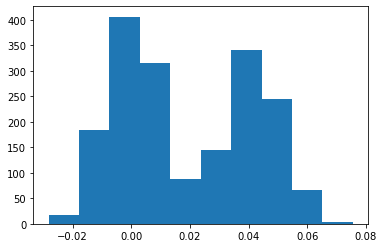

In [69]:
plt.hist(sig_bn.signal())
for th in np.linspace(-0.02, 0.4, 100):
    bits = np.where(sig_bn.signal() >= th, 1, 0)
    dec = ModuleLab1.bin2asc(bits[:len(bits) // 8 * 8], bits = 8, flg = 0)
#     print(dec)
    if ModuleLab1.check_sensible_string(dec):
        print(dec)

In [70]:
sig_bn2, sig_bt2, ixn2 = ModuleLab6.pamrcvr10(sig_xt, [FB / 2, 0.0], 'man', [])

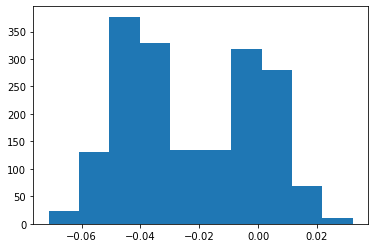

In [71]:
plt.hist(sig_bn2.signal())
for th in np.linspace(-0.02, 0.4, 100):
    bits = np.where(sig_bn2.signal() >= th, 1, 0)
    dec = ModuleLab1.bin2asc(bits[:len(bits) // 8 * 8], bits = 8, flg = 0)
#     print(dec)
    if ModuleLab1.check_sensible_string(dec):
        print(dec)

In [72]:
rn = sig_bn.signal() + sig_bn2.signal()

Podemos perceber a boa separação entre as hipóteses "1" e "0" no histograma abaixo (ao utilizar ambos os filtros conjuntamente)

(array([ 50., 316., 447., 167.,  10.,  57., 286., 356., 108.,  11.]),
 array([-0.07888352, -0.06208513, -0.04528674, -0.02848835, -0.01168996,
         0.00510843,  0.02190683,  0.03870522,  0.05550361,  0.072302  ,
         0.08910039]),
 <a list of 10 Patch objects>)

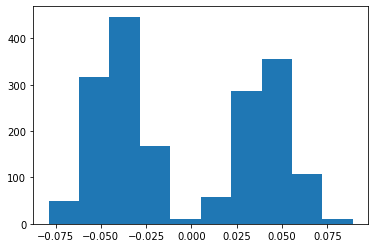

In [73]:
plt.hist(rn)

In [74]:
bits = np.where(rn >= 0, 1, 0)
dec = ModuleLab1.bin2asc(bits[:len(bits) // 8 * 8], bits = 8, flg = 0)
dec

"The alchemists' quest wasn't a hunt for gold, as it's commonly understood. They were after quintessence, the fifth element, beyond air, water, earth, and fire, an elusive link between spirit and matter that permeated all life."